In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inference: importing the essential libraries

In [23]:
df = pd.read_excel('data\insurance.xlsx')
df.head()

# Inference: loading the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. Data Preprocessing

In [58]:
df.info()

# Inference: checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 57.6 KB


### Handle Missing Data:  
    Identify  and  treat  any  missing  values  in  the  dataset  by either removing them or imputing appropriate values

In [59]:
df.isna().sum()

# Inference: checking for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

    Encode  Categorical  Variables:  Convert  categorical  features  such  as  'sex', 'smoker',  and  'region'  into  numerical  formats  using  techniques  like  one-hot encoding or label encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()

# ohe = pd.get_dummies(df['region'])
# df = pd.concat([df, ohe], axis=1)
# df = df.drop('region', axis=1)
# df.head()

# Inference: label encoding the categorical variables 

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


    Scaling/Normalizing  Features:  Apply  feature  scaling  (if  necessary) to continuous variables like age, BMI, and children for better model performance.

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['age', 'bmi', 'children']] = sc.fit_transform(df[['age', 'bmi', 'children']])
df.head()

# Inference: standardizing the numerical variables

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


    Feature Selection: Select relevant features from the dataset that will be used to predict medical insurance costs (age, sex, BMI, children, smoker, region)

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inference: splitting the dataset into train and test

    Model  Building:  Implement  a  linear  regression  model  to  predict  medical insurance charges (target variable) using the features selected

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Inference: creating the linear regression model

    Multicollinearity Check: Perform checks for multicollinearity (e.g., using the Variance Inflation Factor (VIF)) and eliminate highly correlated features, if needed.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif)
df_vif = pd.DataFrame(vif, index = X.columns, columns=['VIF'])
df_vif

# Inference: checking for multicollinearity in the dataset 

,VIF
age,1.014513
sex,1.566982
bmi,1.022282
children,1.002043
smoker,1.207526
region,1.573703


    Model Training: Fit the linear regression model on the training data to establish a relationship between the features and the target variable (insurance costs).

In [66]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

# Inference: training and testing the model

0.7833463107364539

    Performance Metrics Calculation: After training the model on the training set, evaluate its performance on the testing set by calculating

■ Mean Absolute Error (MAE):  Measures  the  average  magnitude  of  the errors.

■ Mean Squared Error (MSE):  Measures  the  average  squared  difference between actual and predicted values.

■ Root Mean Squared Error (RMSE): The square root of MSE, providing an error estimate in the same units as the target variable.

■ R-squared (R2) Score: Indicates the proportion of variance in the target variable explained by the model.

■ Adjusted  R-squared:  Adjusts  the  R2  score  based  on  the  number  of predictors, penalizing models that include irrelevant features.

■ Residual  Sum  of  Squares  (RSS):  Quantifies  the  total  squared  error between the predicted and actual values.

■ Explained Variance Score:  Evaluates  how  much  of  the  variance  in  the target variable is captured by the model

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(y_true, y_pred, X):
    n = X.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

def residual_sum_of_squares(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

def variance_score(y_true, y_pred):
    return 1 - residual_sum_of_squares(y_true, y_pred) / residual_sum_of_squares(y_true, np.mean(y_true))

y_pred = lr.predict(X_test) 

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
print('Adjusted R2 Score:', adjusted_r2_score(y_test, y_pred, X_test))
print('Residual Sum of Squares:', residual_sum_of_squares(y_test, y_pred))
print('Variance Score:', variance_score(y_test, y_pred))

# Inference: evaluating the model using various metrics like Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 Score, Adjusted R2 Score, Residual Sum of Squares, Variance Score etc.

Mean Absolute Error: 4186.508898366431
Mean Squared Error: 33635210.431178406
Root Mean Squared Error: 5799.587091438356
R2 Score: 0.7833463107364539
Adjusted R2 Score: 0.7783657661556826
Residual Sum of Squares: 9014236395.555813
Variance Score: 0.7833463107364539


# 4. Feature Importance Analysis

    Coefficient  Interpretation:  Examine  the  coefficients  of  the  linear  regression model to determine the impact of each feature (age, BMI, smoking status, etc.) on medical insurance costs

array([ 3.61028043e+03, -1.87914567e+01,  2.04689296e+03,  5.12253132e+02,
        2.36478181e+04, -2.71284266e+02])

    Feature Ranking: Identify the most important features based on their contribution to the model, with a particular focus on whether smoking status or BMI significantly increases costs.

# 5. Visualization

    Scatterplot for Model Performance: Create a scatterplot showing actual vs. predicted insurance charges. This visual will help in assessing how well the model fits the data, and it will highlight any discrepancies between predicted and actual values (e.g., overfitting or underfitting)

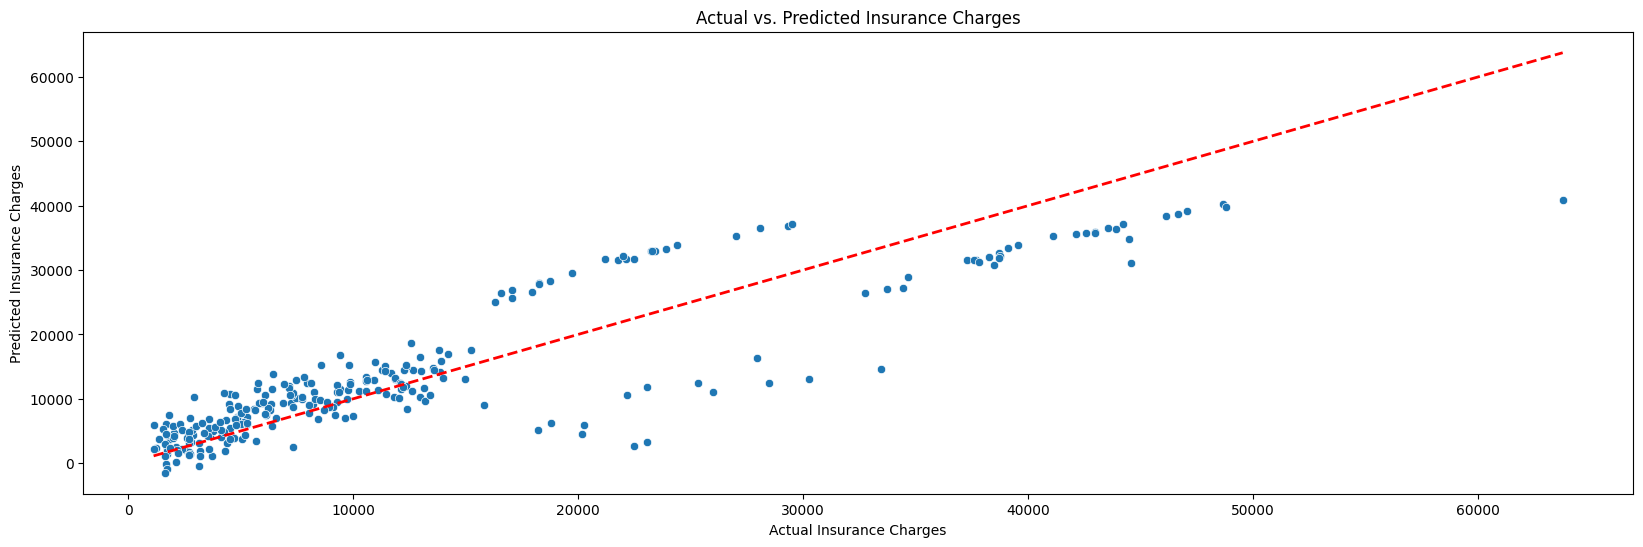

In [68]:
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Diagonal line
plt.show()

# Inference: plotting the actual vs. predicted values

# 6. Residual Analysis:

    Residual Plot: Visualize the residuals (difference between predicted and actual values) to check for patterns, ensuring that errors are randomly distributed, a key assumption in linear regression.

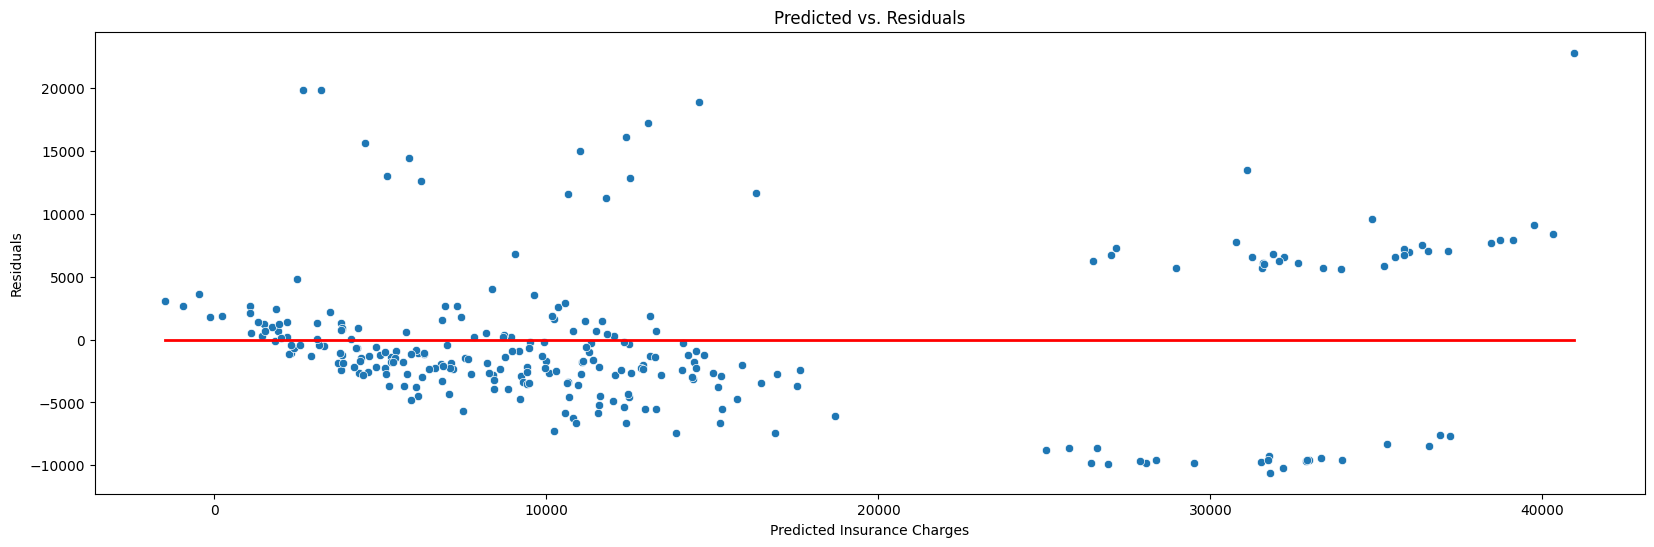

In [69]:
residuals = y_test - y_pred

plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Insurance Charges")
plt.ylabel("Residuals")
plt.title("Predicted vs. Residuals")
plt.plot([y_pred.min(), y_pred.max()], [0, 0], color='red', lw=2)
plt.show()

# Inference: plotting the predicted vs. residuals